In [5]:
import os
import shutil
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dir_list = ['boron-B',
 'calcium-Ca',
#  'healthy',
 'iron-Fe',
 'magnesium-Mg',
 'manganese-Mn',
 'more-deficiencies',
 'nitrogen-N',
 'phosphorus-P',
 'potasium-K']

for classes in dir_list:
    
    kaggle_input_dir = '/kaggle/input/coleaf/CoLeaf DATASET/' + classes

    temp_dir = '/kaggle/working/temp/' + classes

    if not os.path.exists(temp_dir):
        os.makedirs(temp_dir)

    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest'
    )

    generated_images = datagen.flow_from_directory(
        kaggle_input_dir,
        save_to_dir=temp_dir,
        batch_size = 1,
        save_prefix=classes,
        save_format='jpg'
    )

    num_images = 300
    for i in range(num_images):
        generated_image = next(generated_images)


    shutil.make_archive('/kaggle/temp/' + classes, 'zip', temp_dir)

Found 101 images belonging to 1 classes.
Found 162 images belonging to 1 classes.
Found 65 images belonging to 1 classes.
Found 79 images belonging to 1 classes.
Found 83 images belonging to 1 classes.
Found 104 images belonging to 1 classes.
Found 64 images belonging to 1 classes.
Found 246 images belonging to 1 classes.
Found 96 images belonging to 1 classes.


In [7]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.applications import VGG16
import seaborn as sns
import PIL

In [8]:
dataset = '/kaggle/working/temp'

In [9]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [11]:
data = datagen.flow_from_directory(dataset, target_size=(224,224), batch_size = 4500)

Found 2700 images belonging to 9 classes.


In [12]:
images, labels = next(data)

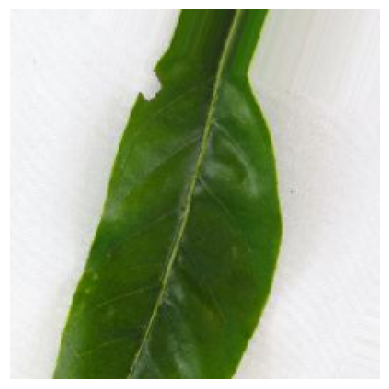

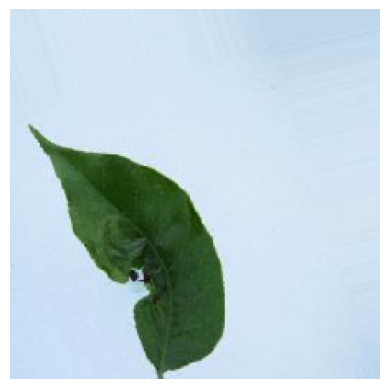

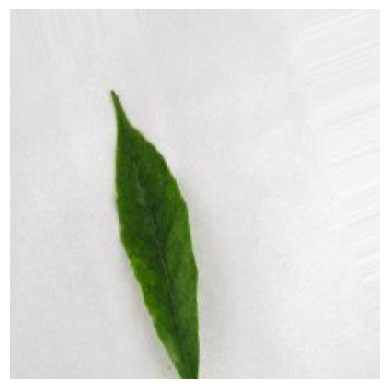

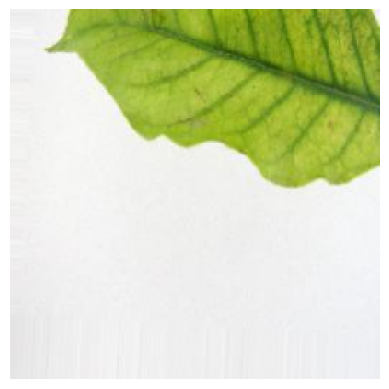

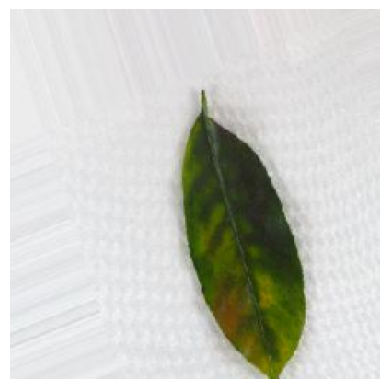

In [13]:
for i in range(5):
    plt.imshow(images[i], cmap='gray')  # Use 'gray' colormap for grayscale images
    plt.axis('off')  # Hide axis
    plt.show()

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.applications import MobileNetV2

# Constants
IMAGE_SIZE = 224

# Load the MobileNetV2 model, excluding the top layers
base_model = MobileNetV2(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), weights='imagenet', include_top=False)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(9, activation='softmax')(x)  # Assuming 9 classes

# Define the complete model
model_mn = Model(inputs=base_model.input, outputs=x)

# Compile the model
model_mn.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy', Precision(), Recall()])

# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# Assuming x_train and y_train are defined and preprocessed correctly
history = model_mn.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=20,
    verbose=1,
    callbacks=[early_stopping]
)


Epoch 1/200
 8/87 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.0710 - loss: 2.8293 - precision_5: 0.0686 - recall_4: 0.0277

W0000 00:00:1716224304.097924     216 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.2713 - loss: 2.0527 - precision_5: 0.4528 - recall_4: 0.0803

W0000 00:00:1716224308.381101     216 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


87/87 ━━━━━━━━━━━━━━━━━━━━ 19s 129ms/step - accuracy: 0.2726 - loss: 2.0490 - precision_5: 0.4554 - recall_4: 0.0811 - val_accuracy: 0.5324 - val_loss: 1.3594 - val_precision_5: 0.7533 - val_recall_4: 0.2616
Epoch 2/200
 5/87 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.5088 - loss: 1.2743 - precision_5: 0.9356 - recall_4: 0.2730

W0000 00:00:1716224315.190039     217 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.5542 - loss: 1.2463 - precision_5: 0.7954 - recall_4: 0.3039 - val_accuracy: 0.5671 - val_loss: 1.2261 - val_precision_5: 0.7523 - val_recall_4: 0.3796
Epoch 3/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.6191 - loss: 1.0621 - precision_5: 0.8132 - recall_4: 0.4073 - val_accuracy: 0.6019 - val_loss: 1.1567 - val_precision_5: 0.7689 - val_recall_4: 0.4236
Epoch 4/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.6705 - loss: 0.9071 - precision_5: 0.8483 - recall_4: 0.5038 - val_accuracy: 0.6088 - val_loss: 1.1230 - val_precision_5: 0.7459 - val_recall_4: 0.4213
Epoch 5/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.7057 - loss: 0.8472 - precision_5: 0.8607 - recall_4: 0.5283 - val_accuracy: 0.6343 - val_loss: 1.0571 - val_precision_5: 0.7614 - val_recall_4: 0.4653
Epoch 6/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.7482 - loss: 0.7506 - precision_5: 0.8973 - recall_4: 0.5929 - val_accurac

In [39]:
# Evaluate the model
loss, accuracy, precision, recall = model_rn.evaluate(x_test, y_test)
f1 = 2 * (precision * recall) / (precision + recall)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')



17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 182ms/step - accuracy: 0.6237 - loss: 1.0511 - precision_4: 0.7148 - recall_3: 0.5475
Loss: 1.0186352729797363
Accuracy: 0.6407407522201538
Precision: 0.748110830783844
Recall: 0.550000011920929
F1 Score: 0.633938108077059


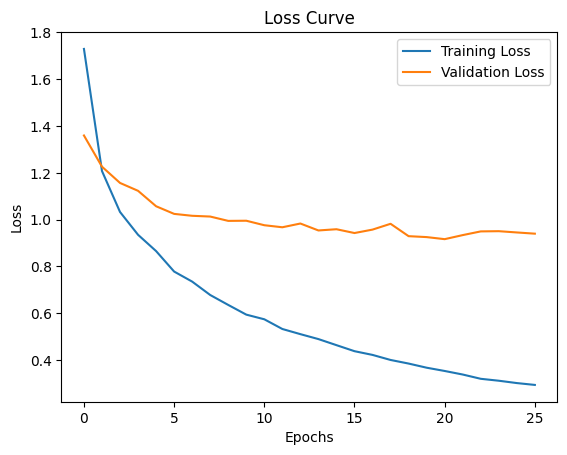

In [40]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Precision, Recall
from sklearn.metrics import f1_score

IMAGE_SIZE = 224
base_model = ResNet152V2(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), weights='imagenet', include_top=False)

# Freeze the layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(9, activation='softmax')(x)
model_rn = Model(inputs=base_model.input, outputs=x)

# Compile the model
model_rn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# Fit the model
history = model_rn.fit(x_train, y_train,
                       validation_split=0.2,
                       epochs=200,
                       batch_size=50,
                       verbose=1,
                       callbacks=[early_stopping])



Epoch 1/200


W0000 00:00:1716223629.623850     219 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step - accuracy: 0.1830 - loss: 2.3101 - precision_4: 0.3013 - recall_3: 0.0264

W0000 00:00:1716223645.523439     216 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1716223656.525500     216 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


35/35 ━━━━━━━━━━━━━━━━━━━━ 60s 987ms/step - accuracy: 0.1855 - loss: 2.3019 - precision_4: 0.3093 - recall_3: 0.0273 - val_accuracy: 0.4120 - val_loss: 1.5816 - val_precision_4: 0.6263 - val_recall_3: 0.1435
Epoch 2/200


W0000 00:00:1716223663.271888     218 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


35/35 ━━━━━━━━━━━━━━━━━━━━ 13s 363ms/step - accuracy: 0.4757 - loss: 1.4640 - precision_4: 0.7428 - recall_3: 0.1778 - val_accuracy: 0.4954 - val_loss: 1.3659 - val_precision_4: 0.6826 - val_recall_3: 0.2639
Epoch 3/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 13s 372ms/step - accuracy: 0.5667 - loss: 1.2582 - precision_4: 0.8293 - recall_3: 0.2901 - val_accuracy: 0.5185 - val_loss: 1.2988 - val_precision_4: 0.6557 - val_recall_3: 0.2778
Epoch 4/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 13s 367ms/step - accuracy: 0.6343 - loss: 1.0914 - precision_4: 0.8575 - recall_3: 0.3740 - val_accuracy: 0.5231 - val_loss: 1.2881 - val_precision_4: 0.6636 - val_recall_3: 0.3287
Epoch 5/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 13s 359ms/step - accuracy: 0.6676 - loss: 1.0067 - precision_4: 0.8618 - recall_3: 0.4212 - val_accuracy: 0.5440 - val_loss: 1.2170 - val_precision_4: 0.6941 - val_recall_3: 0.3519
Epoch 6/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 12s 354ms/step - accuracy: 0.6926 - loss: 0.9391 - precision_4: 0.8736 - recall_3: 0.4535 - v

W0000 00:00:1716224035.410352     218 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Loss: 1.0186352729797363
Accuracy: 0.6407407522201538
Precision: 0.748110830783844
Recall: 0.550000011920929
F1 Score: 0.633938108077059
 2/17 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step

W0000 00:00:1716224045.720331     218 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


17/17 ━━━━━━━━━━━━━━━━━━━━ 22s 761ms/step


W0000 00:00:1716224057.888100     219 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


F1 Score (sklearn): 0.6437268625810612


In [41]:
# Evaluate the model
loss, accuracy, precision, recall = model_rn.evaluate(x_test, y_test)
f1 = 2 * (precision * recall) / (precision + recall)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 181ms/step - accuracy: 0.6237 - loss: 1.0511 - precision_4: 0.7148 - recall_3: 0.5475
Loss: 1.0186352729797363
Accuracy: 0.6407407522201538
Precision: 0.748110830783844
Recall: 0.550000011920929
F1 Score: 0.633938108077059


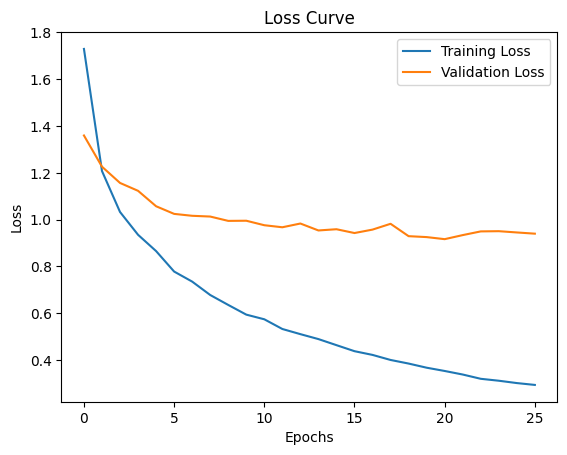

In [42]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()